# Zoomcamp homework - week 1  
This notebook is about NYC taxi trip records of 2023 January and February trip records. 

## Import libraries

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Import data

In [37]:
df_train = pd.read_parquet('../data/yellow_tripdata_2023-01.parquet')
len(df_train)

3066766

In [5]:
df_train = df_train.sample(frac=0.3, replace=True, random_state=1).reset_index()

In [6]:
col_1 = df_train.columns.to_list()

print(col_1)


['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


We can see that the column 'airport_fee' is diferent in both df, before merge it, we need to change it

In [7]:
target = ['duration']


## work 

In [8]:
#Convert to datetime
df_train['tpep_dropoff_datetime'] = pd.to_datetime(df_train['tpep_dropoff_datetime'])
df_train['tpep_pickup_datetime'] = pd.to_datetime(df_train['tpep_pickup_datetime'])

#Create duration column
df_train['duration'] = df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']
# Obtain only mins
df_train['duration'] = df_train['duration'].dt.total_seconds() / 60

### Q1 - Downloading the data

In [9]:
print(len(df_train.columns.to_list()))

21


### Q2. Computing duration

In [10]:
std_duration = df_train['duration'].std()
std_duration

42.73755405338852

### Q3. Dropping outliers

In [11]:
df_train['duration'].describe()

count    920030.000000
mean         15.672866
std          42.737554
min         -29.200000
25%           7.100000
50%          11.516667
75%          18.300000
max        6179.400000
Name: duration, dtype: float64

<Axes: >

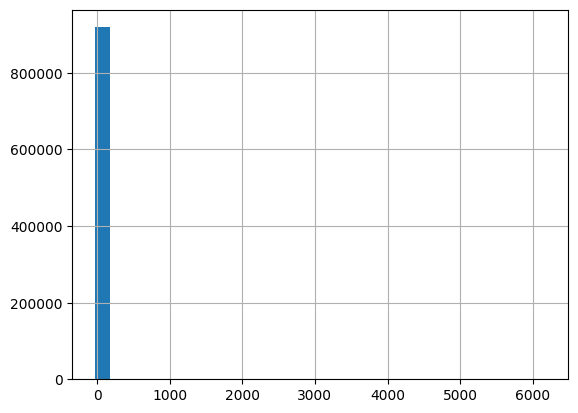

In [12]:
# Check the outliers 
df_train['duration'].hist(bins=30)

<Axes: >

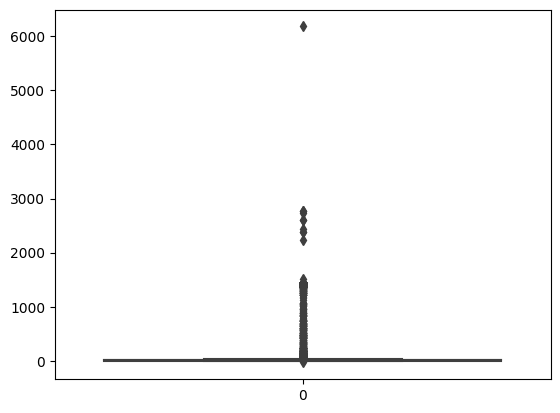

In [13]:
sns.boxplot(data = df_train['duration'])

This graffic show as that there are some outliers in this variable, let's get only values between 1-60 min 

In [14]:
len_before_outliers = len(df_train)

In [15]:
df_train = df_train[(df_train['duration'] >= 1) & (df_train['duration'] <= 60)]
len_after_outliers = len(df_train)

<Axes: >

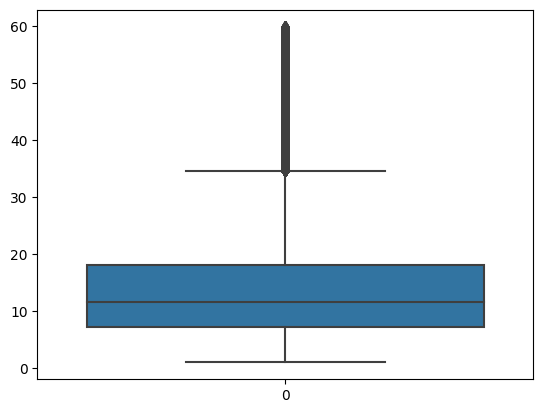

In [16]:
sns.boxplot(data = df_train['duration'])

Now we have a more explainable boxplot

In [17]:
print(f' len before drop outliers: {len_before_outliers}')
print(f' len before drop outliers: {len_after_outliers}')
print(f' outliers droped: {len_before_outliers - len_after_outliers}')
print(f' percentage droped respect start df: {(len_before_outliers - len_after_outliers) / len_before_outliers}')
print(f' percentage final respect start df: {(len_after_outliers) / len_before_outliers}')

 len before drop outliers: 920030
 len before drop outliers: 902644
 outliers droped: 17386
 percentage droped respect start df: 0.01889720987359108
 percentage final respect start df: 0.9811027901264089


### Q4. One-hot encoding

In [18]:
col_categorical = ['PULocationID', 'DOLocationID']
col_numerical = ['trip_distance']

df_train[col_categorical] = df_train[col_categorical].astype(str)

df_train = df_train[col_categorical + col_numerical + target]

In [19]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [20]:
encoded_features = enc.fit_transform(df_train[col_categorical])

# Create a new DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out(col_categorical))
print(f'The dimensionality of the one-hot matrix is: {len(one_hot_df.columns.to_list())}')

# Concatenate the one-hot encoded DataFrame with the remaining columns in df_train
df_train = pd.concat([df_train.drop(col_categorical, axis=1), one_hot_df], axis=1)

c:\Users\mario.segura\Anaconda3\envs\Mario\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The dimensionality of the one-hot matrix is: 502


In [21]:
lenght_columns_train = len(df_train.columns.to_list())
print(f'the number of columns are: {lenght_columns_train - 2}')

the number of columns are: 502


In [22]:
df_train = df_train.dropna()

In [23]:
train_cols = df_train.columns.to_list()

### Q5. Training a model

In [24]:
y_train = df_train[target]
X_train = df_train.drop(columns = target)

In [25]:
X_train.head()

,trip_distance,PULocationID_1,PULocationID_10,PULocationID_100,PULocationID_101,PULocationID_102,PULocationID_106,PULocationID_107,PULocationID_108,PULocationID_11,...,DOLocationID_9,DOLocationID_90,DOLocationID_91,DOLocationID_92,DOLocationID_93,DOLocationID_94,DOLocationID_95,DOLocationID_96,DOLocationID_97,DOLocationID_98
0,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
print(y_train.isna().sum())
print(X_train.isna().sum())

duration    0
dtype: int64
trip_distance       0
PULocationID_1      0
PULocationID_10     0
PULocationID_100    0
PULocationID_101    0
                   ..
DOLocationID_94     0
DOLocationID_95     0
DOLocationID_96     0
DOLocationID_97     0
DOLocationID_98     0
Length: 503, dtype: int64


In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)

In [28]:
mean_squared_error(y_train, y_pred_train, squared=False)

9.935068461950705

### test-validation

In [29]:
df_test = pd.read_parquet('../data/yellow_tripdata_2023-02.parquet')
df_test = df_test.sample(frac=0.3, replace=True, random_state=1).reset_index()

In [30]:
col_2 = df_test.columns.to_list()
print(col_2)
df_test.rename(columns = {'Airport_fee' : 'airport_fee'}, inplace = True)

['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [31]:
#Convert to datetime
df_test['tpep_dropoff_datetime'] = pd.to_datetime(df_test['tpep_dropoff_datetime'])
df_test['tpep_pickup_datetime'] = pd.to_datetime(df_test['tpep_pickup_datetime'])

#Create duration column
df_test['duration'] = df_test['tpep_dropoff_datetime'] - df_test['tpep_pickup_datetime']
# Obtain only mins
df_test['duration'] = df_test['duration'].dt.total_seconds() / 60

In [32]:
df_test[col_categorical] = df_test[col_categorical].astype(str)

df_test = df_test[col_categorical + col_numerical + target]

In [33]:
encoded_features_test = enc.transform(df_test[col_categorical])

# Create a new DataFrame with the one-hot encoded columns
one_hot_df_test = pd.DataFrame(encoded_features_test, columns=enc.get_feature_names_out(col_categorical))

# Concatenate the one-hot encoded DataFrame with the remaining columns in df_train
df_test = pd.concat([df_test.drop(col_categorical, axis=1), one_hot_df_test], axis=1)

In [34]:
#df_test = df_test[train_cols]
y_test = df_test[target]
X_test = df_test.drop(columns = target)

In [35]:
y_pred_test = lr.predict(X_test)

In [36]:
mean_squared_error(y_test, y_pred_test, squared=False)

2166715.944548844